In [40]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

import pickle as pk

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import VarianceThreshold



from sklearn.feature_selection import RFE

# show up charts when export notebooks
%matplotlib inline

In [41]:
df_train=pd.read_csv('mpg.csv')
df_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [42]:
df_train.shape

(398, 9)

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [44]:
df_train.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [45]:
df_train.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [46]:
df_train.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

## MPG is the target

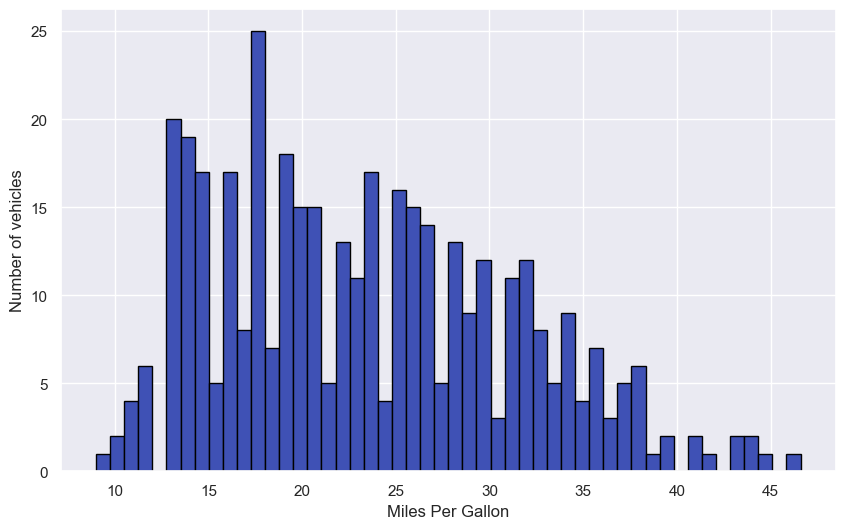

In [47]:
plt.figure(figsize=(10,6))
plt.hist(df_train['mpg'],bins=50,ec='black',color='#3F51B5')
plt.xlabel("Miles Per Gallon")
plt.ylabel("Number of vehicles")
plt.show()

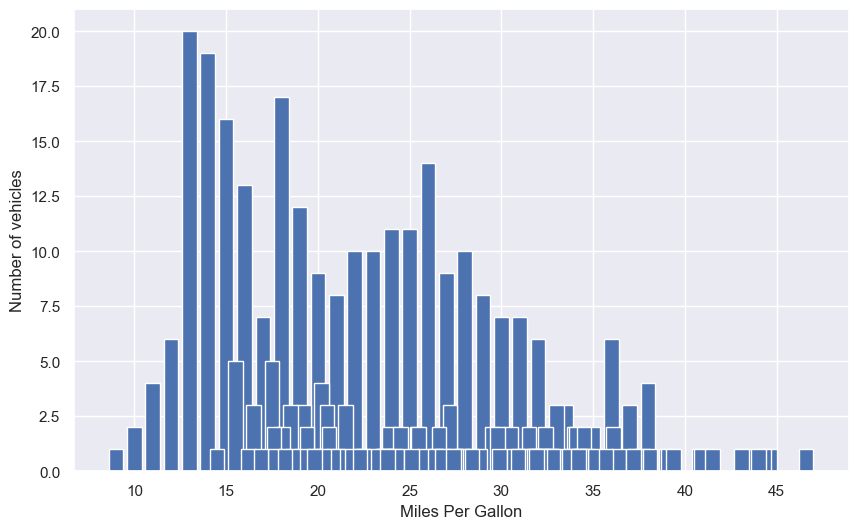

In [48]:
# With outliers 
frequency=df_train['mpg'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(frequency.index,height=frequency)
plt.xlabel("Miles Per Gallon")
plt.ylabel("Number of vehicles")
plt.show()

In [49]:
frequency

mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: count, Length: 129, dtype: int64

## Removing Outliers

In [50]:
# Outlier function with threshold 2. Function to get list of outliers
def outliers_z_score(df):
    threshold = 2

    mean = np.mean(df)
    std = np.std(df)
    z_scores = [(y - mean) / std for y in df] #Used a Z-Score to remove the outliers
    return np.where(np.abs(z_scores) > threshold)

In [51]:
# Selecting only the numerical columns in data set
my_list = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_columns = list(df_train.select_dtypes(include=my_list).columns)
numerical_columns = df_train[num_columns]
numerical_columns.head(3)

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
0,18.0,8,307.0,3504,12.0,70,1
1,15.0,8,350.0,3693,11.5,70,1
2,18.0,8,318.0,3436,11.0,70,1


In [52]:
# Calling the outlier function and Calculating the outlier of dataset
outlier_list = numerical_columns.apply(lambda x: outliers_z_score(x))
outlier_list

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
0,"[244, 247, 309, 322, 324, 325, 326, 329, 330, ...",[],"[5, 6, 7, 8, 13, 67, 90, 94, 95]","[28, 42, 43, 44, 90, 94, 95, 103, 104, 137, 156]","[5, 6, 7, 8, 9, 10, 11, 12, 13, 59, 116, 195, ...",[],[]


In [53]:
# Making outlier list ot dataframe
df_of_outlier = outlier_list.iloc[0]
df_of_outlier = pd.DataFrame(df_of_outlier)
df_of_outlier.columns = ['Rows_to_exclude']
df_of_outlier

,Rows_to_exclude
mpg,"[244, 247, 309, 322, 324, 325, 326, 329, 330, ..."
cylinders,[]
displacement,"[5, 6, 7, 8, 13, 67, 90, 94, 95]"
weight,"[28, 42, 43, 44, 90, 94, 95, 103, 104, 137, 156]"
acceleration,"[5, 6, 7, 8, 9, 10, 11, 12, 13, 59, 116, 195, ..."
model_year,[]
origin,[]


In [54]:
# Convert all values from column Rows_to_exclude to a numpy array
outlier_list_final = df_of_outlier['Rows_to_exclude'].to_numpy()

# Concatenate a whole sequence of arrays
outlier_list_final = np.concatenate( outlier_list_final, axis=0 )

# Drop duplicate values
outlier_list_final_unique = set(outlier_list_final)
outlier_list_final_unique

{5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 28,
 42,
 43,
 44,
 59,
 67,
 90,
 94,
 95,
 103,
 104,
 116,
 137,
 156,
 195,
 196,
 209,
 244,
 247,
 299,
 300,
 309,
 322,
 324,
 325,
 326,
 328,
 329,
 330,
 394}

In [55]:
# Removing outliers from the dataset
filter_rows_to_exclude = df_train.index.isin(outlier_list_final_unique)
clean_data = df_train[~filter_rows_to_exclude]
clean_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


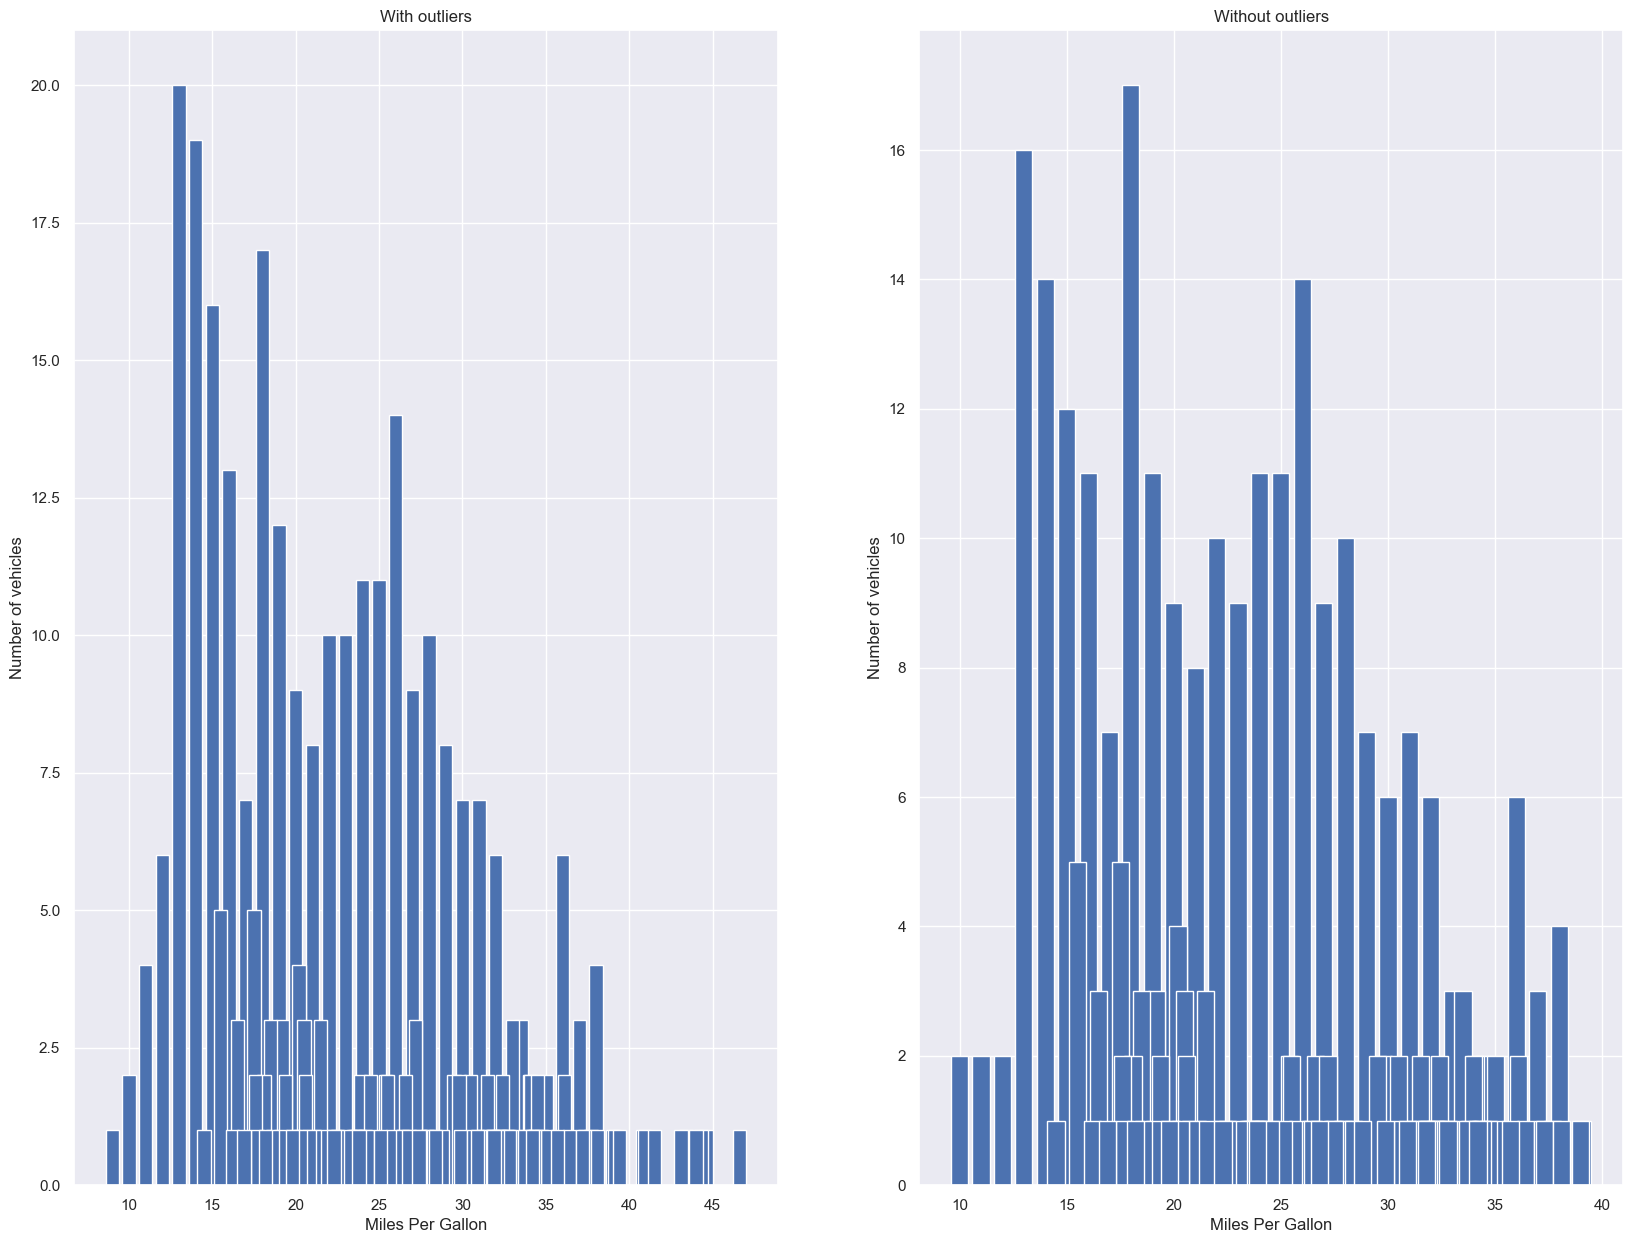

In [56]:
plt.figure(figsize=(20,15))

# With outliers
plt.subplot(1,2,1)
plt.title("With outliers")
frequency=df_train['mpg'].value_counts()
plt.bar(frequency.index,height=frequency)
plt.xlabel("Miles Per Gallon")
plt.ylabel("Number of vehicles")

# Without outliers
plt.subplot(1,2,2)
plt.title("Without outliers")
frequency=clean_data['mpg'].value_counts()
plt.bar(frequency.index,height=frequency)
plt.xlabel("Miles Per Gallon")
plt.ylabel("Number of vehicles")
plt.show()

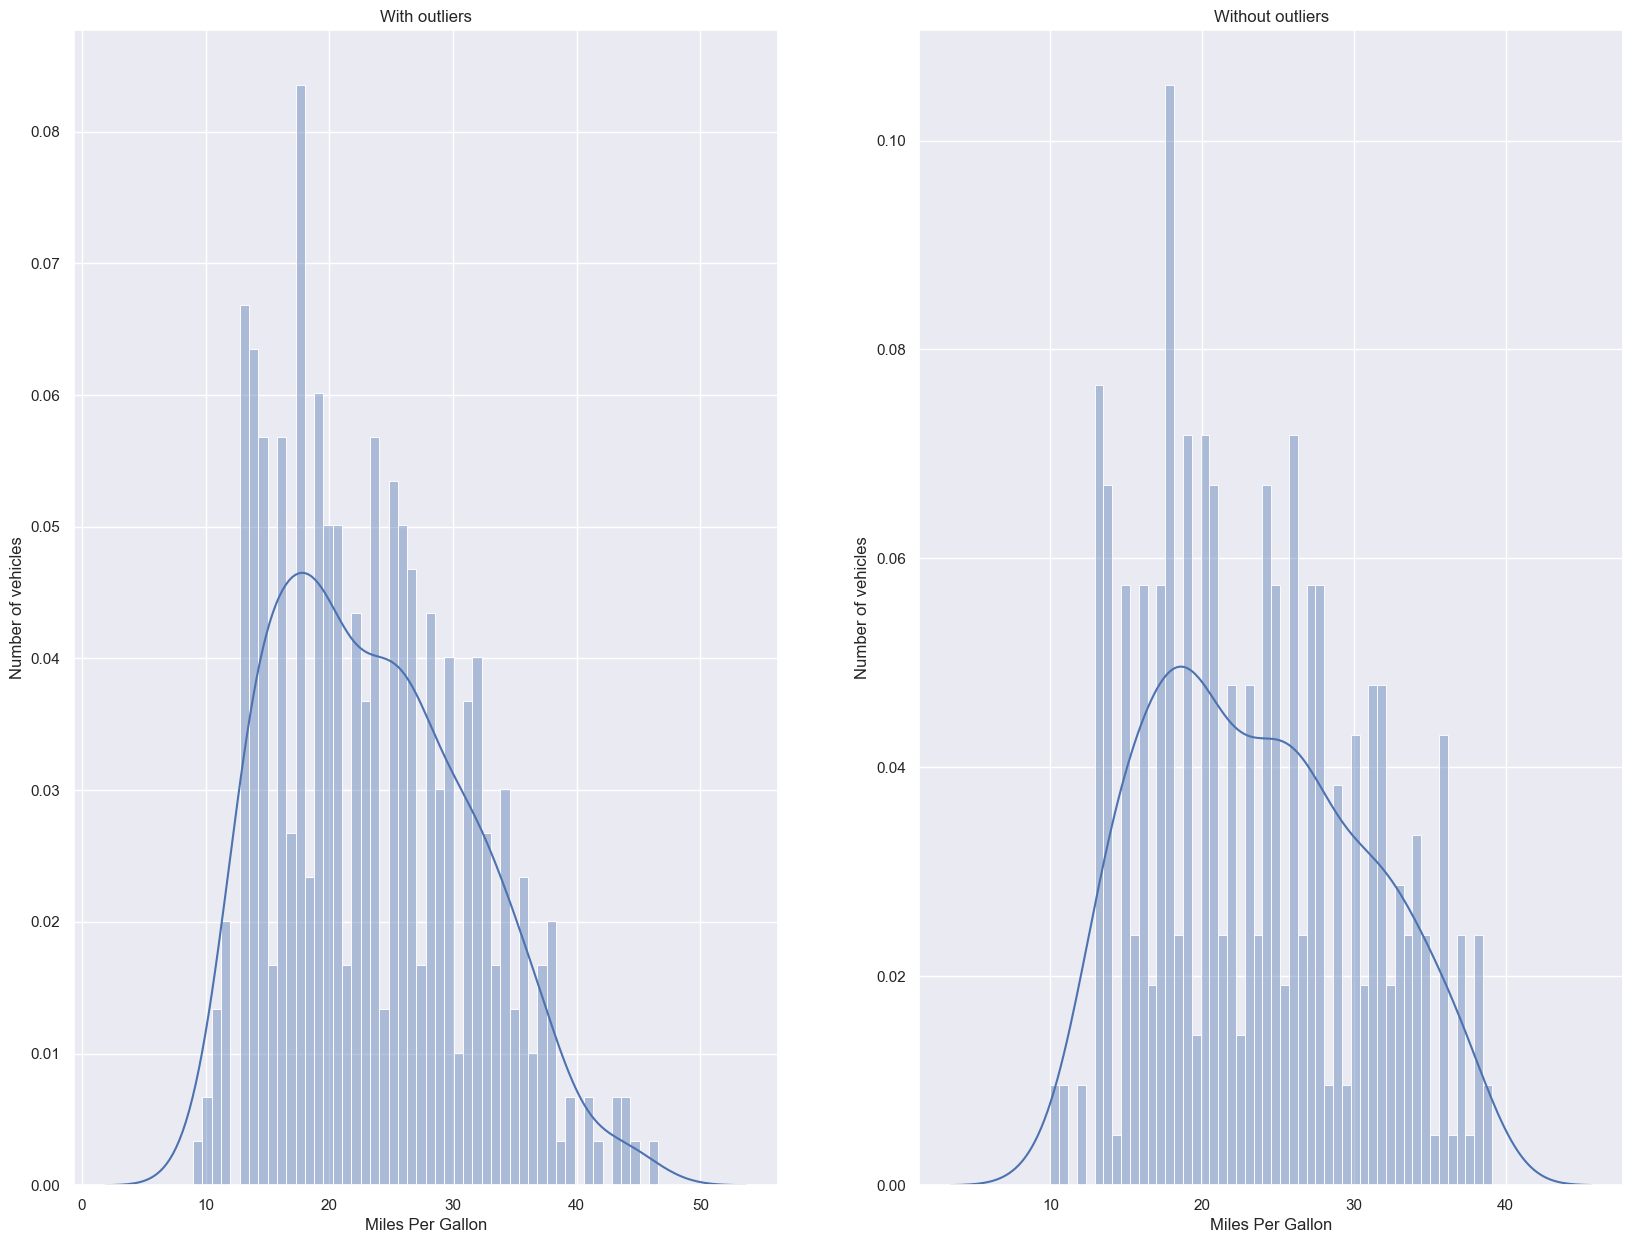

In [57]:
plt.figure(figsize=(20,15))

# With outliers
plt.subplot(1,2,1)
plt.title("With outliers")
sns.histplot(df_train['mpg'],bins=50,kde=True,stat="density",kde_kws=dict(cut=3),alpha=0.4)
plt.xlabel("Miles Per Gallon")
plt.ylabel("Number of vehicles")

# Without outliers
plt.subplot(1,2,2)
plt.title("Without outliers")
sns.histplot(clean_data['mpg'],bins=50,kde=True,stat="density",kde_kws=dict(cut=3),alpha=0.4)
plt.xlabel("Miles Per Gallon")
plt.ylabel("Number of vehicles")
plt.show()

<Axes: xlabel='mpg'>

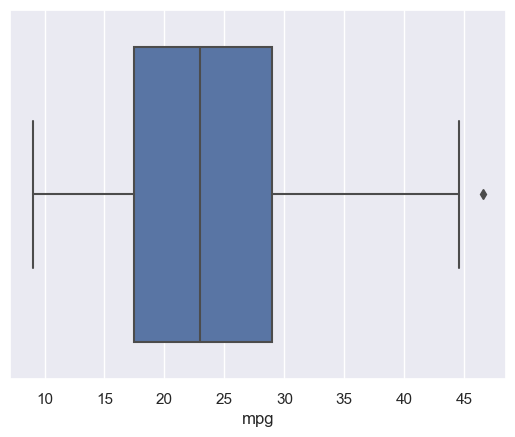

In [58]:
# Distribution before outlier removal
sns.boxplot(x='mpg', data=df_train)

<Axes: xlabel='mpg'>

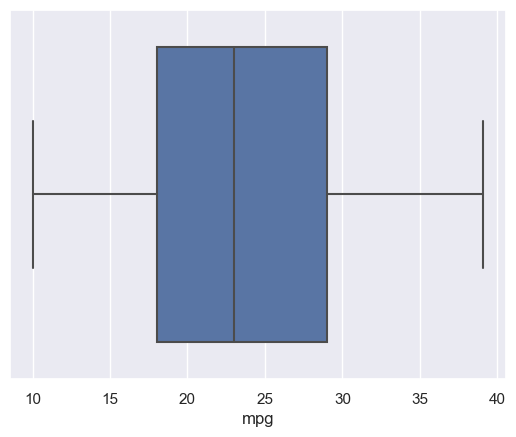

In [59]:
# Distribution after outlier removal
sns.boxplot(x='mpg', data=clean_data)

## Cleaning Data

In [60]:
clean_data.head(50)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
14,24.0,4,113.0,95,2372,15.0,70,3,toyota corona mark ii
15,22.0,6,198.0,95,2833,15.5,70,1,plymouth duster
16,18.0,6,199.0,97,2774,15.5,70,1,amc hornet
17,21.0,6,200.0,85,2587,16.0,70,1,ford maverick
18,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510


In [61]:
#Replacing ? with NaN
clean_data.loc[:,'horsepower'] = clean_data['horsepower'].replace('?', np.nan)

In [62]:
clean_data.head(50)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
14,24.0,4,113.0,95,2372,15.0,70,3,toyota corona mark ii
15,22.0,6,198.0,95,2833,15.5,70,1,plymouth duster
16,18.0,6,199.0,97,2774,15.5,70,1,amc hornet
17,21.0,6,200.0,85,2587,16.0,70,1,ford maverick
18,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510


In [63]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           359 non-null    float64
 1   cylinders     359 non-null    int64  
 2   displacement  359 non-null    float64
 3   horsepower    354 non-null    object 
 4   weight        359 non-null    int64  
 5   acceleration  359 non-null    float64
 6   model_year    359 non-null    int64  
 7   origin        359 non-null    int64  
 8   name          359 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [64]:
clean_data.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [65]:
clean_data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [66]:
# Missing Values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [67]:
missing_values_table(clean_data)

Your selected dataframe has 9 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
horsepower,5,1.4


In [68]:
# Using KNN removing null values
from sklearn.impute import KNNImputer

# Assuming you want to impute missing values in the 'horsepower' column
column_to_impute = 'horsepower'

# Create a KNNImputer object
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform only the selected column using KNN imputation
clean_data.loc[:,column_to_impute] = knn_imputer.fit_transform(clean_data[[column_to_impute]])

In [69]:
clean_data.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [70]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           359 non-null    float64
 1   cylinders     359 non-null    int64  
 2   displacement  359 non-null    float64
 3   horsepower    359 non-null    object 
 4   weight        359 non-null    int64  
 5   acceleration  359 non-null    float64
 6   model_year    359 non-null    int64  
 7   origin        359 non-null    int64  
 8   name          359 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [71]:
clean_data = clean_data.copy()
clean_data['horsepower']=clean_data['horsepower'].astype(float)
clean_data['weight']=clean_data['weight'].astype(float)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           359 non-null    float64
 1   cylinders     359 non-null    int64  
 2   displacement  359 non-null    float64
 3   horsepower    359 non-null    float64
 4   weight        359 non-null    float64
 5   acceleration  359 non-null    float64
 6   model_year    359 non-null    int64  
 7   origin        359 non-null    int64  
 8   name          359 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.0+ KB


## Dimensionality Reduction

In [72]:
# Dimensionality reduction PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Assuming df contains your dataset with discrete and continuous variables
# Separate discrete and continuous variables
discrete_cols = clean_data.select_dtypes(include=['object']).columns
continuous_cols = clean_data.select_dtypes(include=['int64', 'float64']).columns

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),  # Standardize continuous variables
        ('cat', OneHotEncoder(), discrete_cols)     # One-hot encode discrete variables
    ])

# Define TruncatedSVD models
svd_original = TruncatedSVD(n_components=2)  # TruncatedSVD for original dataset
svd_encoded = TruncatedSVD(n_components=2)    # TruncatedSVD for encoded dataset

# Define pipelines
pipeline_original = Pipeline(steps=[('preprocessor', preprocessor), ('svd', svd_original)])
pipeline_encoded = Pipeline(steps=[('preprocessor', preprocessor), ('svd', svd_encoded)])

# Fit and transform data
X_original_svd = pipeline_original.fit_transform(clean_data)
X_encoded_svd = pipeline_encoded.fit_transform(clean_data)

# Analyze explained variance ratio
explained_variance_ratio_original = svd_original.explained_variance_ratio_
explained_variance_ratio_encoded = svd_encoded.explained_variance_ratio_

# Print explained variance ratio
print("Explained Variance Ratio - Original:", explained_variance_ratio_original)
print("Explained Variance Ratio - Encoded:", explained_variance_ratio_encoded)


Explained Variance Ratio - Original: [0.57541746 0.11147616]
Explained Variance Ratio - Encoded: [0.57541746 0.11147616]


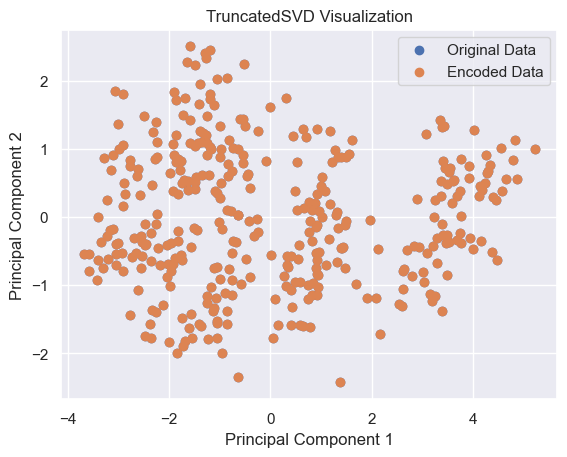

In [73]:
# Visualize principal components (if reduced to 2 components)
if X_original_svd.shape[1] == 2:
    plt.scatter(X_original_svd[:, 0], X_original_svd[:, 1], label='Original Data')
    plt.scatter(X_encoded_svd[:, 0], X_encoded_svd[:, 1], label='Encoded Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('TruncatedSVD Visualization')
    plt.legend()
    plt.show()

In [74]:
# Feature Selection using Varience Threshold
# Compute the variance of each feature before and after applying the threshold
variances_before = X_encoded_svd.var()
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X_encoded_svd)
variances_after = pd.Series(selector.variances_)

# Print the variances before and after feature selection
print("Variances Before Threshold:")
print(variances_before)
print("\nVariances After Threshold:")
print(variances_after)

Variances Before Threshold:
3.0893931314936545

Variances After Threshold:
0    5.176029
1    1.002757
dtype: float64


In [75]:
from sklearn.model_selection import train_test_split

# Assuming y represents the target variable in your dataset
# If you have already separated the target variable from the DataFrame, you can use it directly
# If not, replace 'target_variable_name' with the name of your target variable column
y = clean_data['mpg']
#X = df_processed.drop(columns=['mpg','name'])  # Drop the target variable from the features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_svd, y, test_size=0.2, random_state=42)

## Regression

In [76]:
!pip3 install catboost
!pip3 install lightgbm
!pip3 install xgboost
# Modelling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet, BayesianRidge, HuberRegressor, ElasticNetCV
from sklearn.gaussian_process import GaussianProcessRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(),
    "Elastic Net": ElasticNet(),
    "Bayesian Ridge": BayesianRidge(),
    "Huber": HuberRegressor(),
    "Gaussian Process": GaussianProcessRegressor(),
    "CatBoost": CatBoostRegressor(),
    "LightGBM": LGBMRegressor(),
    "Elastic NetCV": ElasticNetCV(),
    "AdaBoost": AdaBoostRegressor()
}

# Evaluate each model
evaluation_results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE from MSE
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evaluation_results[model_name] = {"Mean Squared Error": mse, "Root Mean Squared Error": rmse, "Mean Absolute Error": mae, "R2 Score": r2}

# Print evaluation results
print("\nEvaluation Metrics:")
for model_name, metrics in evaluation_results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


Evaluating Linear Regression...
Evaluating Ridge Regression...
Evaluating Lasso Regression...
Evaluating Decision Tree Regressor...
Evaluating Random Forest Regressor...
Evaluating Gradient Boosting Regressor...
Evaluating XGBoost...
Evaluating SVR...
Evaluating KNN...
Evaluating Neural Network...


C:\Users\rkran\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Evaluating Elastic Net...
Evaluating Bayesian Ridge...
Evaluating Huber...
Evaluating Gaussian Process...
Evaluating CatBoost...
Learning rate set to 0.033614
0:	learn: 6.8888905	total: 1.05ms	remaining: 1.05s
1:	learn: 6.7266388	total: 1.9ms	remaining: 947ms
2:	learn: 6.5590278	total: 2.76ms	remaining: 917ms
3:	learn: 6.4004799	total: 3.58ms	remaining: 893ms
4:	learn: 6.2620441	total: 4.38ms	remaining: 871ms
5:	learn: 6.1223765	total: 5.24ms	remaining: 868ms
6:	learn: 5.9800004	total: 6ms	remaining: 852ms
7:	learn: 5.8465505	total: 6.8ms	remaining: 843ms
8:	learn: 5.7050641	total: 7.47ms	remaining: 823ms
9:	learn: 5.5699023	total: 8.17ms	remaining: 809ms
10:	learn: 5.4359135	total: 8.91ms	remaining: 801ms
11:	learn: 5.3187098	total: 9.63ms	remaining: 793ms
12:	learn: 5.2015670	total: 10.4ms	remaining: 786ms
13:	learn: 5.0839013	total: 11.1ms	remaining: 785ms
14:	learn: 4.9836045	total: 11.9ms	remaining: 784ms
15:	learn: 4.8767639	total: 12.7ms	remaining: 779ms
16:	learn: 4.7738001	tot

215:	learn: 1.8894909	total: 161ms	remaining: 586ms
216:	learn: 1.8888717	total: 162ms	remaining: 586ms
217:	learn: 1.8871910	total: 163ms	remaining: 585ms
218:	learn: 1.8848776	total: 164ms	remaining: 584ms
219:	learn: 1.8837116	total: 164ms	remaining: 582ms
220:	learn: 1.8820698	total: 165ms	remaining: 581ms
221:	learn: 1.8805650	total: 166ms	remaining: 580ms
222:	learn: 1.8786670	total: 166ms	remaining: 579ms
223:	learn: 1.8770569	total: 167ms	remaining: 578ms
224:	learn: 1.8756890	total: 168ms	remaining: 577ms
225:	learn: 1.8746581	total: 168ms	remaining: 576ms
226:	learn: 1.8733761	total: 169ms	remaining: 575ms
227:	learn: 1.8723793	total: 170ms	remaining: 574ms
228:	learn: 1.8714064	total: 170ms	remaining: 573ms
229:	learn: 1.8696000	total: 171ms	remaining: 572ms
230:	learn: 1.8686383	total: 172ms	remaining: 571ms
231:	learn: 1.8676771	total: 172ms	remaining: 570ms
232:	learn: 1.8666845	total: 173ms	remaining: 570ms
233:	learn: 1.8643452	total: 174ms	remaining: 569ms
234:	learn: 

455:	learn: 1.6108144	total: 356ms	remaining: 424ms
456:	learn: 1.6098707	total: 356ms	remaining: 424ms
457:	learn: 1.6081655	total: 357ms	remaining: 423ms
458:	learn: 1.6077236	total: 358ms	remaining: 422ms
459:	learn: 1.6054842	total: 359ms	remaining: 421ms
460:	learn: 1.6038593	total: 359ms	remaining: 420ms
461:	learn: 1.6026280	total: 360ms	remaining: 419ms
462:	learn: 1.5993904	total: 361ms	remaining: 418ms
463:	learn: 1.5988154	total: 361ms	remaining: 418ms
464:	learn: 1.5961230	total: 362ms	remaining: 417ms
465:	learn: 1.5960032	total: 363ms	remaining: 416ms
466:	learn: 1.5958035	total: 364ms	remaining: 415ms
467:	learn: 1.5953062	total: 364ms	remaining: 414ms
468:	learn: 1.5949859	total: 365ms	remaining: 413ms
469:	learn: 1.5935837	total: 366ms	remaining: 412ms
470:	learn: 1.5915001	total: 366ms	remaining: 411ms
471:	learn: 1.5910748	total: 367ms	remaining: 410ms
472:	learn: 1.5906650	total: 367ms	remaining: 409ms
473:	learn: 1.5891379	total: 368ms	remaining: 408ms
474:	learn: 

704:	learn: 1.3138590	total: 539ms	remaining: 225ms
705:	learn: 1.3132547	total: 540ms	remaining: 225ms
706:	learn: 1.3131272	total: 540ms	remaining: 224ms
707:	learn: 1.3119207	total: 541ms	remaining: 223ms
708:	learn: 1.3108667	total: 542ms	remaining: 222ms
709:	learn: 1.3100201	total: 542ms	remaining: 221ms
710:	learn: 1.3094595	total: 543ms	remaining: 221ms
711:	learn: 1.3069386	total: 544ms	remaining: 220ms
712:	learn: 1.3056413	total: 544ms	remaining: 219ms
713:	learn: 1.3053667	total: 545ms	remaining: 218ms
714:	learn: 1.3046537	total: 546ms	remaining: 218ms
715:	learn: 1.3035802	total: 547ms	remaining: 217ms
716:	learn: 1.3018078	total: 547ms	remaining: 216ms
717:	learn: 1.3016775	total: 548ms	remaining: 215ms
718:	learn: 1.3009075	total: 549ms	remaining: 214ms
719:	learn: 1.2998220	total: 550ms	remaining: 214ms
720:	learn: 1.2981417	total: 550ms	remaining: 213ms
721:	learn: 1.2979774	total: 551ms	remaining: 212ms
722:	learn: 1.2965835	total: 552ms	remaining: 211ms
723:	learn: 

966:	learn: 1.1008973	total: 722ms	remaining: 24.7ms
967:	learn: 1.0984724	total: 723ms	remaining: 23.9ms
968:	learn: 1.0978716	total: 724ms	remaining: 23.2ms
969:	learn: 1.0963253	total: 725ms	remaining: 22.4ms
970:	learn: 1.0962395	total: 726ms	remaining: 21.7ms
971:	learn: 1.0955745	total: 726ms	remaining: 20.9ms
972:	learn: 1.0946633	total: 727ms	remaining: 20.2ms
973:	learn: 1.0940388	total: 728ms	remaining: 19.4ms
974:	learn: 1.0928443	total: 728ms	remaining: 18.7ms
975:	learn: 1.0915473	total: 729ms	remaining: 17.9ms
976:	learn: 1.0909734	total: 730ms	remaining: 17.2ms
977:	learn: 1.0897479	total: 731ms	remaining: 16.4ms
978:	learn: 1.0888523	total: 731ms	remaining: 15.7ms
979:	learn: 1.0883982	total: 732ms	remaining: 14.9ms
980:	learn: 1.0875623	total: 733ms	remaining: 14.2ms
981:	learn: 1.0874095	total: 733ms	remaining: 13.4ms
982:	learn: 1.0862748	total: 734ms	remaining: 12.7ms
983:	learn: 1.0861616	total: 735ms	remaining: 11.9ms
984:	learn: 1.0852800	total: 735ms	remaining: 

In [77]:
# Perform Cross Validation
from sklearn.model_selection import cross_val_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(),
    "Elastic Net": ElasticNet(),
    "Bayesian Ridge": BayesianRidge(),
    "Huber": HuberRegressor(),
    "Gaussian Process": GaussianProcessRegressor(),
    "CatBoost": CatBoostRegressor(),
    "LightGBM": LGBMRegressor(),
    "Elastic NetCV": ElasticNetCV(),
    "AdaBoost": AdaBoostRegressor()
}

# Evaluate each model using cross-validation
cv_results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    # Perform cross-validation with 5 folds
    scores = cross_val_score(model, X_encoded_svd, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
    mean_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)
    cv_results[model_name] = {"Mean RMSE": mean_rmse, "Std RMSE": std_rmse}

# Print cross-validation results
print("\nCross-Validation Results:")
for model_name, results in cv_results.items():
    print(f"{model_name}:")
    print(f"Mean RMSE: {results['Mean RMSE']}, Std RMSE: {results['Std RMSE']}")


Evaluating Linear Regression...
Evaluating Ridge Regression...
Evaluating Lasso Regression...
Evaluating Decision Tree Regressor...
Evaluating Random Forest Regressor...
Evaluating Gradient Boosting Regressor...
Evaluating XGBoost...
Evaluating SVR...
Evaluating KNN...
Evaluating Neural Network...


C:\Users\rkran\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rkran\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rkran\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rkran\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rkran\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Evaluating Elastic Net...
Evaluating Bayesian Ridge...
Evaluating Huber...
Evaluating Gaussian Process...
Evaluating CatBoost...
Learning rate set to 0.033614
0:	learn: 6.9301461	total: 999us	remaining: 999ms
1:	learn: 6.7701057	total: 1.79ms	remaining: 895ms
2:	learn: 6.6113959	total: 2.55ms	remaining: 848ms
3:	learn: 6.4507177	total: 3.35ms	remaining: 835ms
4:	learn: 6.3084718	total: 4.21ms	remaining: 838ms
5:	learn: 6.1592110	total: 5.02ms	remaining: 831ms
6:	learn: 6.0053187	total: 5.76ms	remaining: 818ms
7:	learn: 5.8704170	total: 6.57ms	remaining: 815ms
8:	learn: 5.7299690	total: 7.36ms	remaining: 810ms
9:	learn: 5.5919570	total: 8.11ms	remaining: 803ms
10:	learn: 5.4597082	total: 8.92ms	remaining: 802ms
11:	learn: 5.3301764	total: 9.62ms	remaining: 792ms
12:	learn: 5.2125205	total: 10.4ms	remaining: 788ms
13:	learn: 5.0968441	total: 11.1ms	remaining: 783ms
14:	learn: 4.9913918	total: 11.9ms	remaining: 778ms
15:	learn: 4.8831248	total: 12.7ms	remaining: 778ms
16:	learn: 4.7804387

166:	learn: 1.9484798	total: 127ms	remaining: 634ms
167:	learn: 1.9471217	total: 128ms	remaining: 634ms
168:	learn: 1.9458540	total: 129ms	remaining: 633ms
169:	learn: 1.9436033	total: 130ms	remaining: 633ms
170:	learn: 1.9419673	total: 130ms	remaining: 632ms
171:	learn: 1.9407694	total: 131ms	remaining: 631ms
172:	learn: 1.9387466	total: 132ms	remaining: 631ms
173:	learn: 1.9379564	total: 133ms	remaining: 630ms
174:	learn: 1.9363774	total: 134ms	remaining: 630ms
175:	learn: 1.9354690	total: 134ms	remaining: 629ms
176:	learn: 1.9337999	total: 135ms	remaining: 628ms
177:	learn: 1.9310631	total: 136ms	remaining: 628ms
178:	learn: 1.9294071	total: 137ms	remaining: 627ms
179:	learn: 1.9280203	total: 137ms	remaining: 626ms
180:	learn: 1.9265723	total: 138ms	remaining: 626ms
181:	learn: 1.9254100	total: 139ms	remaining: 625ms
182:	learn: 1.9228473	total: 140ms	remaining: 625ms
183:	learn: 1.9206120	total: 141ms	remaining: 624ms
184:	learn: 1.9184514	total: 141ms	remaining: 623ms
185:	learn: 

428:	learn: 1.5629180	total: 308ms	remaining: 410ms
429:	learn: 1.5602715	total: 309ms	remaining: 410ms
430:	learn: 1.5589774	total: 310ms	remaining: 409ms
431:	learn: 1.5577462	total: 310ms	remaining: 408ms
432:	learn: 1.5570300	total: 311ms	remaining: 407ms
433:	learn: 1.5552457	total: 312ms	remaining: 406ms
434:	learn: 1.5541878	total: 312ms	remaining: 406ms
435:	learn: 1.5519452	total: 313ms	remaining: 405ms
436:	learn: 1.5505983	total: 314ms	remaining: 404ms
437:	learn: 1.5492610	total: 314ms	remaining: 403ms
438:	learn: 1.5483727	total: 315ms	remaining: 402ms
439:	learn: 1.5471003	total: 316ms	remaining: 402ms
440:	learn: 1.5458997	total: 316ms	remaining: 401ms
441:	learn: 1.5454511	total: 317ms	remaining: 400ms
442:	learn: 1.5452106	total: 317ms	remaining: 399ms
443:	learn: 1.5434238	total: 318ms	remaining: 398ms
444:	learn: 1.5413179	total: 319ms	remaining: 398ms
445:	learn: 1.5400579	total: 319ms	remaining: 397ms
446:	learn: 1.5380727	total: 320ms	remaining: 396ms
447:	learn: 

697:	learn: 1.2322676	total: 492ms	remaining: 213ms
698:	learn: 1.2314057	total: 493ms	remaining: 212ms
699:	learn: 1.2304145	total: 494ms	remaining: 212ms
700:	learn: 1.2292703	total: 495ms	remaining: 211ms
701:	learn: 1.2282161	total: 496ms	remaining: 210ms
702:	learn: 1.2271287	total: 496ms	remaining: 210ms
703:	learn: 1.2261350	total: 497ms	remaining: 209ms
704:	learn: 1.2249197	total: 498ms	remaining: 208ms
705:	learn: 1.2240868	total: 499ms	remaining: 208ms
706:	learn: 1.2234817	total: 500ms	remaining: 207ms
707:	learn: 1.2224382	total: 501ms	remaining: 206ms
708:	learn: 1.2213439	total: 501ms	remaining: 206ms
709:	learn: 1.2202754	total: 502ms	remaining: 205ms
710:	learn: 1.2199620	total: 503ms	remaining: 204ms
711:	learn: 1.2192928	total: 504ms	remaining: 204ms
712:	learn: 1.2184273	total: 504ms	remaining: 203ms
713:	learn: 1.2174997	total: 505ms	remaining: 202ms
714:	learn: 1.2160425	total: 506ms	remaining: 202ms
715:	learn: 1.2154118	total: 507ms	remaining: 201ms
716:	learn: 

946:	learn: 1.0326201	total: 675ms	remaining: 37.8ms
947:	learn: 1.0321049	total: 676ms	remaining: 37.1ms
948:	learn: 1.0319657	total: 677ms	remaining: 36.4ms
949:	learn: 1.0318402	total: 678ms	remaining: 35.7ms
950:	learn: 1.0310245	total: 678ms	remaining: 35ms
951:	learn: 1.0308441	total: 679ms	remaining: 34.2ms
952:	learn: 1.0294466	total: 680ms	remaining: 33.5ms
953:	learn: 1.0289910	total: 680ms	remaining: 32.8ms
954:	learn: 1.0288839	total: 681ms	remaining: 32.1ms
955:	learn: 1.0286854	total: 682ms	remaining: 31.4ms
956:	learn: 1.0285692	total: 682ms	remaining: 30.7ms
957:	learn: 1.0273656	total: 683ms	remaining: 29.9ms
958:	learn: 1.0268299	total: 684ms	remaining: 29.2ms
959:	learn: 1.0261240	total: 684ms	remaining: 28.5ms
960:	learn: 1.0247546	total: 685ms	remaining: 27.8ms
961:	learn: 1.0239499	total: 686ms	remaining: 27.1ms
962:	learn: 1.0230241	total: 687ms	remaining: 26.4ms
963:	learn: 1.0229117	total: 687ms	remaining: 25.7ms
964:	learn: 1.0220330	total: 688ms	remaining: 24

163:	learn: 1.9253025	total: 106ms	remaining: 539ms
164:	learn: 1.9241709	total: 107ms	remaining: 540ms
165:	learn: 1.9221014	total: 107ms	remaining: 540ms
166:	learn: 1.9203918	total: 108ms	remaining: 539ms
167:	learn: 1.9177415	total: 109ms	remaining: 538ms
168:	learn: 1.9159915	total: 109ms	remaining: 538ms
169:	learn: 1.9140935	total: 110ms	remaining: 537ms
170:	learn: 1.9120247	total: 111ms	remaining: 536ms
171:	learn: 1.9104825	total: 111ms	remaining: 536ms
172:	learn: 1.9080203	total: 112ms	remaining: 535ms
173:	learn: 1.9067030	total: 113ms	remaining: 534ms
174:	learn: 1.9054729	total: 113ms	remaining: 534ms
175:	learn: 1.9033395	total: 114ms	remaining: 533ms
176:	learn: 1.9000437	total: 114ms	remaining: 532ms
177:	learn: 1.8981340	total: 115ms	remaining: 532ms
178:	learn: 1.8970547	total: 116ms	remaining: 531ms
179:	learn: 1.8947940	total: 116ms	remaining: 530ms
180:	learn: 1.8920247	total: 117ms	remaining: 530ms
181:	learn: 1.8914183	total: 118ms	remaining: 529ms
182:	learn: 

421:	learn: 1.5742314	total: 288ms	remaining: 395ms
422:	learn: 1.5721932	total: 289ms	remaining: 394ms
423:	learn: 1.5714638	total: 290ms	remaining: 394ms
424:	learn: 1.5707882	total: 290ms	remaining: 393ms
425:	learn: 1.5687271	total: 291ms	remaining: 392ms
426:	learn: 1.5667350	total: 292ms	remaining: 392ms
427:	learn: 1.5654940	total: 293ms	remaining: 391ms
428:	learn: 1.5636478	total: 293ms	remaining: 390ms
429:	learn: 1.5628249	total: 294ms	remaining: 390ms
430:	learn: 1.5624105	total: 295ms	remaining: 389ms
431:	learn: 1.5615109	total: 295ms	remaining: 388ms
432:	learn: 1.5593656	total: 296ms	remaining: 388ms
433:	learn: 1.5585442	total: 297ms	remaining: 387ms
434:	learn: 1.5569994	total: 297ms	remaining: 386ms
435:	learn: 1.5566875	total: 298ms	remaining: 386ms
436:	learn: 1.5557625	total: 299ms	remaining: 385ms
437:	learn: 1.5543378	total: 299ms	remaining: 384ms
438:	learn: 1.5523203	total: 300ms	remaining: 383ms
439:	learn: 1.5511747	total: 301ms	remaining: 383ms
440:	learn: 

678:	learn: 1.2882958	total: 469ms	remaining: 222ms
679:	learn: 1.2872108	total: 470ms	remaining: 221ms
680:	learn: 1.2861854	total: 471ms	remaining: 220ms
681:	learn: 1.2850131	total: 471ms	remaining: 220ms
682:	learn: 1.2837153	total: 472ms	remaining: 219ms
683:	learn: 1.2823256	total: 473ms	remaining: 218ms
684:	learn: 1.2821663	total: 473ms	remaining: 218ms
685:	learn: 1.2799502	total: 474ms	remaining: 217ms
686:	learn: 1.2796879	total: 474ms	remaining: 216ms
687:	learn: 1.2785430	total: 475ms	remaining: 215ms
688:	learn: 1.2767056	total: 476ms	remaining: 215ms
689:	learn: 1.2745213	total: 477ms	remaining: 214ms
690:	learn: 1.2737788	total: 477ms	remaining: 213ms
691:	learn: 1.2729073	total: 478ms	remaining: 213ms
692:	learn: 1.2712860	total: 479ms	remaining: 212ms
693:	learn: 1.2711270	total: 480ms	remaining: 212ms
694:	learn: 1.2693419	total: 480ms	remaining: 211ms
695:	learn: 1.2677541	total: 481ms	remaining: 210ms
696:	learn: 1.2672907	total: 482ms	remaining: 209ms
697:	learn: 

930:	learn: 1.0772790	total: 653ms	remaining: 48.4ms
931:	learn: 1.0765743	total: 655ms	remaining: 47.8ms
932:	learn: 1.0748411	total: 655ms	remaining: 47.1ms
933:	learn: 1.0741933	total: 656ms	remaining: 46.4ms
934:	learn: 1.0734914	total: 657ms	remaining: 45.7ms
935:	learn: 1.0733995	total: 658ms	remaining: 45ms
936:	learn: 1.0725629	total: 659ms	remaining: 44.3ms
937:	learn: 1.0722893	total: 660ms	remaining: 43.6ms
938:	learn: 1.0722038	total: 661ms	remaining: 42.9ms
939:	learn: 1.0715440	total: 662ms	remaining: 42.2ms
940:	learn: 1.0714970	total: 662ms	remaining: 41.5ms
941:	learn: 1.0707021	total: 663ms	remaining: 40.8ms
942:	learn: 1.0694450	total: 664ms	remaining: 40.1ms
943:	learn: 1.0685340	total: 665ms	remaining: 39.4ms
944:	learn: 1.0678816	total: 666ms	remaining: 38.7ms
945:	learn: 1.0677552	total: 666ms	remaining: 38ms
946:	learn: 1.0676354	total: 667ms	remaining: 37.3ms
947:	learn: 1.0670556	total: 668ms	remaining: 36.6ms
948:	learn: 1.0666389	total: 669ms	remaining: 35.9

115:	learn: 2.1725660	total: 95.7ms	remaining: 730ms
116:	learn: 2.1690952	total: 96.8ms	remaining: 730ms
117:	learn: 2.1654048	total: 97.7ms	remaining: 730ms
118:	learn: 2.1625423	total: 98.5ms	remaining: 729ms
119:	learn: 2.1598122	total: 99.4ms	remaining: 729ms
120:	learn: 2.1569091	total: 100ms	remaining: 729ms
121:	learn: 2.1548003	total: 101ms	remaining: 728ms
122:	learn: 2.1518397	total: 102ms	remaining: 727ms
123:	learn: 2.1490182	total: 103ms	remaining: 726ms
124:	learn: 2.1459699	total: 104ms	remaining: 726ms
125:	learn: 2.1425197	total: 105ms	remaining: 725ms
126:	learn: 2.1398474	total: 105ms	remaining: 724ms
127:	learn: 2.1369611	total: 106ms	remaining: 723ms
128:	learn: 2.1344824	total: 107ms	remaining: 723ms
129:	learn: 2.1313971	total: 108ms	remaining: 722ms
130:	learn: 2.1288023	total: 109ms	remaining: 721ms
131:	learn: 2.1258948	total: 110ms	remaining: 720ms
132:	learn: 2.1238763	total: 110ms	remaining: 720ms
133:	learn: 2.1218562	total: 111ms	remaining: 718ms
134:	le

360:	learn: 1.6938055	total: 290ms	remaining: 513ms
361:	learn: 1.6922371	total: 291ms	remaining: 512ms
362:	learn: 1.6911018	total: 291ms	remaining: 512ms
363:	learn: 1.6901553	total: 292ms	remaining: 511ms
364:	learn: 1.6891693	total: 293ms	remaining: 510ms
365:	learn: 1.6859914	total: 294ms	remaining: 509ms
366:	learn: 1.6834017	total: 295ms	remaining: 508ms
367:	learn: 1.6821517	total: 295ms	remaining: 507ms
368:	learn: 1.6806787	total: 296ms	remaining: 506ms
369:	learn: 1.6796861	total: 297ms	remaining: 506ms
370:	learn: 1.6786619	total: 298ms	remaining: 505ms
371:	learn: 1.6774537	total: 299ms	remaining: 504ms
372:	learn: 1.6760284	total: 299ms	remaining: 503ms
373:	learn: 1.6744663	total: 300ms	remaining: 502ms
374:	learn: 1.6717873	total: 301ms	remaining: 502ms
375:	learn: 1.6694556	total: 302ms	remaining: 501ms
376:	learn: 1.6688224	total: 302ms	remaining: 500ms
377:	learn: 1.6676821	total: 303ms	remaining: 499ms
378:	learn: 1.6650904	total: 304ms	remaining: 499ms
379:	learn: 

566:	learn: 1.4176238	total: 470ms	remaining: 359ms
567:	learn: 1.4169143	total: 471ms	remaining: 359ms
568:	learn: 1.4164969	total: 472ms	remaining: 358ms
569:	learn: 1.4141890	total: 473ms	remaining: 357ms
570:	learn: 1.4128054	total: 474ms	remaining: 356ms
571:	learn: 1.4120208	total: 475ms	remaining: 355ms
572:	learn: 1.4105990	total: 476ms	remaining: 355ms
573:	learn: 1.4092537	total: 477ms	remaining: 354ms
574:	learn: 1.4070049	total: 478ms	remaining: 353ms
575:	learn: 1.4050422	total: 478ms	remaining: 352ms
576:	learn: 1.4043715	total: 479ms	remaining: 351ms
577:	learn: 1.4027841	total: 480ms	remaining: 350ms
578:	learn: 1.4022078	total: 481ms	remaining: 350ms
579:	learn: 1.4007197	total: 482ms	remaining: 349ms
580:	learn: 1.4000719	total: 482ms	remaining: 348ms
581:	learn: 1.3980089	total: 483ms	remaining: 347ms
582:	learn: 1.3969233	total: 484ms	remaining: 346ms
583:	learn: 1.3960721	total: 485ms	remaining: 345ms
584:	learn: 1.3945723	total: 485ms	remaining: 344ms
585:	learn: 

813:	learn: 1.1806475	total: 651ms	remaining: 149ms
814:	learn: 1.1800603	total: 652ms	remaining: 148ms
815:	learn: 1.1790560	total: 653ms	remaining: 147ms
816:	learn: 1.1786313	total: 653ms	remaining: 146ms
817:	learn: 1.1778632	total: 654ms	remaining: 145ms
818:	learn: 1.1777805	total: 655ms	remaining: 145ms
819:	learn: 1.1775102	total: 655ms	remaining: 144ms
820:	learn: 1.1767229	total: 656ms	remaining: 143ms
821:	learn: 1.1764296	total: 656ms	remaining: 142ms
822:	learn: 1.1758609	total: 657ms	remaining: 141ms
823:	learn: 1.1753031	total: 658ms	remaining: 140ms
824:	learn: 1.1738215	total: 658ms	remaining: 140ms
825:	learn: 1.1732450	total: 659ms	remaining: 139ms
826:	learn: 1.1727146	total: 659ms	remaining: 138ms
827:	learn: 1.1717260	total: 660ms	remaining: 137ms
828:	learn: 1.1710282	total: 661ms	remaining: 136ms
829:	learn: 1.1701482	total: 661ms	remaining: 135ms
830:	learn: 1.1680440	total: 662ms	remaining: 135ms
831:	learn: 1.1673319	total: 663ms	remaining: 134ms
832:	learn: 

34:	learn: 3.4245647	total: 24.8ms	remaining: 684ms
35:	learn: 3.3743087	total: 25.7ms	remaining: 688ms
36:	learn: 3.3197617	total: 26.4ms	remaining: 688ms
37:	learn: 3.2699804	total: 27.2ms	remaining: 688ms
38:	learn: 3.2214937	total: 28ms	remaining: 689ms
39:	learn: 3.1736982	total: 28.8ms	remaining: 692ms
40:	learn: 3.1293525	total: 29.6ms	remaining: 693ms
41:	learn: 3.0854664	total: 30.5ms	remaining: 695ms
42:	learn: 3.0472125	total: 31.2ms	remaining: 693ms
43:	learn: 3.0081279	total: 31.9ms	remaining: 694ms
44:	learn: 2.9699377	total: 32.8ms	remaining: 696ms
45:	learn: 2.9345509	total: 33.6ms	remaining: 697ms
46:	learn: 2.8989298	total: 34.4ms	remaining: 698ms
47:	learn: 2.8669941	total: 35.2ms	remaining: 698ms
48:	learn: 2.8331325	total: 36ms	remaining: 699ms
49:	learn: 2.8040809	total: 36.7ms	remaining: 698ms
50:	learn: 2.7729944	total: 37.5ms	remaining: 698ms
51:	learn: 2.7452755	total: 38.3ms	remaining: 698ms
52:	learn: 2.7189063	total: 39ms	remaining: 698ms
53:	learn: 2.69283

301:	learn: 1.6850120	total: 208ms	remaining: 480ms
302:	learn: 1.6819519	total: 209ms	remaining: 480ms
303:	learn: 1.6810351	total: 209ms	remaining: 479ms
304:	learn: 1.6789136	total: 210ms	remaining: 479ms
305:	learn: 1.6769975	total: 211ms	remaining: 478ms
306:	learn: 1.6761400	total: 211ms	remaining: 477ms
307:	learn: 1.6757066	total: 212ms	remaining: 477ms
308:	learn: 1.6737090	total: 213ms	remaining: 476ms
309:	learn: 1.6709140	total: 213ms	remaining: 475ms
310:	learn: 1.6690450	total: 214ms	remaining: 474ms
311:	learn: 1.6682217	total: 215ms	remaining: 474ms
312:	learn: 1.6664100	total: 215ms	remaining: 473ms
313:	learn: 1.6658342	total: 216ms	remaining: 472ms
314:	learn: 1.6636150	total: 217ms	remaining: 472ms
315:	learn: 1.6622699	total: 217ms	remaining: 471ms
316:	learn: 1.6618103	total: 218ms	remaining: 470ms
317:	learn: 1.6612292	total: 219ms	remaining: 469ms
318:	learn: 1.6584110	total: 219ms	remaining: 469ms
319:	learn: 1.6580553	total: 220ms	remaining: 468ms
320:	learn: 

562:	learn: 1.3315078	total: 394ms	remaining: 306ms
563:	learn: 1.3302993	total: 395ms	remaining: 305ms
564:	learn: 1.3290534	total: 395ms	remaining: 304ms
565:	learn: 1.3282441	total: 396ms	remaining: 304ms
566:	learn: 1.3273059	total: 397ms	remaining: 303ms
567:	learn: 1.3255164	total: 397ms	remaining: 302ms
568:	learn: 1.3243286	total: 398ms	remaining: 301ms
569:	learn: 1.3233072	total: 399ms	remaining: 301ms
570:	learn: 1.3225073	total: 399ms	remaining: 300ms
571:	learn: 1.3213519	total: 400ms	remaining: 299ms
572:	learn: 1.3200941	total: 401ms	remaining: 298ms
573:	learn: 1.3195590	total: 401ms	remaining: 298ms
574:	learn: 1.3174620	total: 402ms	remaining: 297ms
575:	learn: 1.3163883	total: 402ms	remaining: 296ms
576:	learn: 1.3152319	total: 403ms	remaining: 296ms
577:	learn: 1.3145017	total: 404ms	remaining: 295ms
578:	learn: 1.3125774	total: 404ms	remaining: 294ms
579:	learn: 1.3093415	total: 405ms	remaining: 293ms
580:	learn: 1.3074444	total: 406ms	remaining: 293ms
581:	learn: 

831:	learn: 1.0640891	total: 579ms	remaining: 117ms
832:	learn: 1.0629072	total: 581ms	remaining: 116ms
833:	learn: 1.0610097	total: 582ms	remaining: 116ms
834:	learn: 1.0599684	total: 582ms	remaining: 115ms
835:	learn: 1.0595419	total: 583ms	remaining: 114ms
836:	learn: 1.0588858	total: 584ms	remaining: 114ms
837:	learn: 1.0579492	total: 585ms	remaining: 113ms
838:	learn: 1.0575618	total: 585ms	remaining: 112ms
839:	learn: 1.0570085	total: 586ms	remaining: 112ms
840:	learn: 1.0561898	total: 587ms	remaining: 111ms
841:	learn: 1.0556025	total: 587ms	remaining: 110ms
842:	learn: 1.0547083	total: 588ms	remaining: 110ms
843:	learn: 1.0545627	total: 589ms	remaining: 109ms
844:	learn: 1.0541412	total: 589ms	remaining: 108ms
845:	learn: 1.0523180	total: 590ms	remaining: 107ms
846:	learn: 1.0508677	total: 591ms	remaining: 107ms
847:	learn: 1.0506041	total: 591ms	remaining: 106ms
848:	learn: 1.0494605	total: 592ms	remaining: 105ms
849:	learn: 1.0487574	total: 593ms	remaining: 105ms
850:	learn: 

65:	learn: 2.2302761	total: 43.7ms	remaining: 618ms
66:	learn: 2.2148017	total: 44.6ms	remaining: 621ms
67:	learn: 2.1998931	total: 45.3ms	remaining: 621ms
68:	learn: 2.1870922	total: 46ms	remaining: 621ms
69:	learn: 2.1723436	total: 46.8ms	remaining: 621ms
70:	learn: 2.1592443	total: 47.5ms	remaining: 621ms
71:	learn: 2.1464209	total: 48.1ms	remaining: 621ms
72:	learn: 2.1347870	total: 48.8ms	remaining: 620ms
73:	learn: 2.1242927	total: 49.5ms	remaining: 619ms
74:	learn: 2.1125017	total: 50.1ms	remaining: 618ms
75:	learn: 2.1034569	total: 50.8ms	remaining: 618ms
76:	learn: 2.0944795	total: 51.5ms	remaining: 617ms
77:	learn: 2.0838086	total: 52.2ms	remaining: 617ms
78:	learn: 2.0753033	total: 52.8ms	remaining: 616ms
79:	learn: 2.0669986	total: 53.5ms	remaining: 616ms
80:	learn: 2.0593136	total: 54.2ms	remaining: 615ms
81:	learn: 2.0500133	total: 54.9ms	remaining: 615ms
82:	learn: 2.0418335	total: 55.6ms	remaining: 614ms
83:	learn: 2.0348986	total: 56.2ms	remaining: 613ms
84:	learn: 2.0

290:	learn: 1.5977801	total: 223ms	remaining: 544ms
291:	learn: 1.5962750	total: 226ms	remaining: 548ms
292:	learn: 1.5944252	total: 228ms	remaining: 550ms
293:	learn: 1.5925277	total: 229ms	remaining: 550ms
294:	learn: 1.5918109	total: 230ms	remaining: 551ms
295:	learn: 1.5891681	total: 231ms	remaining: 550ms
296:	learn: 1.5859383	total: 233ms	remaining: 551ms
297:	learn: 1.5855296	total: 234ms	remaining: 550ms
298:	learn: 1.5852096	total: 235ms	remaining: 550ms
299:	learn: 1.5822132	total: 236ms	remaining: 550ms
300:	learn: 1.5819035	total: 237ms	remaining: 550ms
301:	learn: 1.5798836	total: 238ms	remaining: 550ms
302:	learn: 1.5774915	total: 239ms	remaining: 549ms
303:	learn: 1.5769768	total: 240ms	remaining: 549ms
304:	learn: 1.5739523	total: 240ms	remaining: 548ms
305:	learn: 1.5712056	total: 241ms	remaining: 547ms
306:	learn: 1.5697647	total: 242ms	remaining: 546ms
307:	learn: 1.5676434	total: 243ms	remaining: 546ms
308:	learn: 1.5655060	total: 244ms	remaining: 545ms
309:	learn: 

525:	learn: 1.3057673	total: 404ms	remaining: 364ms
526:	learn: 1.3043207	total: 404ms	remaining: 363ms
527:	learn: 1.3030968	total: 405ms	remaining: 362ms
528:	learn: 1.3022217	total: 406ms	remaining: 361ms
529:	learn: 1.3020253	total: 406ms	remaining: 360ms
530:	learn: 1.3017819	total: 407ms	remaining: 360ms
531:	learn: 1.3003930	total: 408ms	remaining: 359ms
532:	learn: 1.3000292	total: 408ms	remaining: 358ms
533:	learn: 1.2976365	total: 409ms	remaining: 357ms
534:	learn: 1.2965343	total: 410ms	remaining: 356ms
535:	learn: 1.2960262	total: 410ms	remaining: 355ms
536:	learn: 1.2948454	total: 411ms	remaining: 354ms
537:	learn: 1.2938085	total: 412ms	remaining: 354ms
538:	learn: 1.2934841	total: 413ms	remaining: 353ms
539:	learn: 1.2922802	total: 413ms	remaining: 352ms
540:	learn: 1.2911227	total: 414ms	remaining: 351ms
541:	learn: 1.2896880	total: 415ms	remaining: 351ms
542:	learn: 1.2892483	total: 416ms	remaining: 350ms
543:	learn: 1.2884018	total: 416ms	remaining: 349ms
544:	learn: 

770:	learn: 1.0903537	total: 585ms	remaining: 174ms
771:	learn: 1.0897867	total: 586ms	remaining: 173ms
772:	learn: 1.0892200	total: 587ms	remaining: 172ms
773:	learn: 1.0890136	total: 588ms	remaining: 172ms
774:	learn: 1.0873186	total: 588ms	remaining: 171ms
775:	learn: 1.0867682	total: 589ms	remaining: 170ms
776:	learn: 1.0858298	total: 590ms	remaining: 169ms
777:	learn: 1.0851346	total: 590ms	remaining: 168ms
778:	learn: 1.0830154	total: 591ms	remaining: 168ms
779:	learn: 1.0822406	total: 592ms	remaining: 167ms
780:	learn: 1.0820400	total: 593ms	remaining: 166ms
781:	learn: 1.0816964	total: 594ms	remaining: 165ms
782:	learn: 1.0811884	total: 594ms	remaining: 165ms
783:	learn: 1.0803883	total: 595ms	remaining: 164ms
784:	learn: 1.0801749	total: 596ms	remaining: 163ms
785:	learn: 1.0789410	total: 597ms	remaining: 162ms
786:	learn: 1.0787076	total: 598ms	remaining: 162ms
787:	learn: 1.0767460	total: 599ms	remaining: 161ms
788:	learn: 1.0764895	total: 600ms	remaining: 160ms
789:	learn: 

985:	learn: 0.9508953	total: 766ms	remaining: 10.9ms
986:	learn: 0.9506858	total: 767ms	remaining: 10.1ms
987:	learn: 0.9503656	total: 768ms	remaining: 9.33ms
988:	learn: 0.9501006	total: 769ms	remaining: 8.55ms
989:	learn: 0.9493672	total: 770ms	remaining: 7.78ms
990:	learn: 0.9491998	total: 771ms	remaining: 7ms
991:	learn: 0.9489160	total: 771ms	remaining: 6.22ms
992:	learn: 0.9475737	total: 772ms	remaining: 5.44ms
993:	learn: 0.9465387	total: 773ms	remaining: 4.67ms
994:	learn: 0.9461041	total: 774ms	remaining: 3.89ms
995:	learn: 0.9458890	total: 775ms	remaining: 3.11ms
996:	learn: 0.9453493	total: 775ms	remaining: 2.33ms
997:	learn: 0.9451022	total: 776ms	remaining: 1.55ms
998:	learn: 0.9443166	total: 777ms	remaining: 777us
999:	learn: 0.9436601	total: 778ms	remaining: 0us
Evaluating LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bin

Evaluating AdaBoost...

Cross-Validation Results:
Linear Regression:
Mean RMSE: 3.2034921366752074, Std RMSE: 0.5587950609182852
Ridge Regression:
Mean RMSE: 3.2026700355101125, Std RMSE: 0.5604939015559558
Lasso Regression:
Mean RMSE: 3.374570839417146, Std RMSE: 1.055570127129316
Decision Tree Regressor:
Mean RMSE: 3.2351871164859487, Std RMSE: 0.4884653098041052
Random Forest Regressor:
Mean RMSE: 2.740057263840032, Std RMSE: 0.47706515787706294
Gradient Boosting Regressor:
Mean RMSE: 2.719579767598869, Std RMSE: 0.5893723825935814
XGBoost:
Mean RMSE: 2.9033095424020248, Std RMSE: 0.5500868129176069
SVR:
Mean RMSE: 2.645217053596807, Std RMSE: 0.776278871574755
KNN:
Mean RMSE: 2.741602741426265, Std RMSE: 0.42532332696507075
Neural Network:
Mean RMSE: 7.621080979724885, Std RMSE: 1.7182119529649573
Elastic Net:
Mean RMSE: 3.37598650024812, Std RMSE: 1.175183817174639
Bayesian Ridge:
Mean RMSE: 3.20318879086157, Std RMSE: 0.562532167360845
Huber:
Mean RMSE: 3.2475592776362063, Std RM

In [79]:
# Performing Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for each model
param_grid = {
    "Linear Regression": {},
    "Ridge Regression": {"alpha": [0.1, 1.0, 10.0]},
    "Lasso Regression": {"alpha": [0.1, 1.0, 10.0]},
    "Decision Tree Regressor": {"max_depth": [None, 10, 20]},
    "Random Forest Regressor": {"n_estimators": [100, 200, 300], "max_depth": [None, 10, 20]},
    "Gradient Boosting Regressor": {"n_estimators": [100, 200, 300], "max_depth": [3, 5, 7]},
    "XGBoost": {"n_estimators": [100, 200, 300], "max_depth": [3, 5, 7]},
    "SVR": {"C": [0.1, 1.0, 10.0], "gamma": ["scale", "auto"]},
    "KNN": {"n_neighbors": [3, 5, 7]},
    "Neural Network": {"hidden_layer_sizes": [(100,), (200,), (300,)], "alpha": [0.0001, 0.001, 0.01]},
    "Elastic Net": {"alpha": [0.1, 1.0, 10.0], "l1_ratio": [0.25, 0.5, 0.75]},
    "Bayesian Ridge": {"alpha_1": [1e-06, 1e-05, 0.0001], "alpha_2": [1e-06, 1e-05, 0.0001], "lambda_1": [1e-06, 1e-05, 0.0001], "lambda_2": [1e-06, 1e-05, 0.0001]},
    "Huber": {"alpha": [0.0001, 0.001, 0.01]},
    "Gaussian Process": {},
    "CatBoost": {"n_estimators": [100, 200, 300], "max_depth": [3, 5, 7]},
    "LightGBM": {"n_estimators": [100, 200, 300], "max_depth": [3, 5, 7]},
    "Elastic NetCV": {},
    "AdaBoost": {"n_estimators": [50, 100, 150]}
}

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(),
    "Elastic Net": ElasticNet(),
    "Bayesian Ridge": BayesianRidge(),
    "Huber": HuberRegressor(),
    "Gaussian Process": GaussianProcessRegressor(),
    "CatBoost": CatBoostRegressor(),
    "LightGBM": LGBMRegressor(),
    "Elastic NetCV": ElasticNetCV(),
    "AdaBoost": AdaBoostRegressor()
}

# Initialize dictionary to store best models
best_models = {}

# Perform hyperparameter tuning using GridSearchCV
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    # Initialize GridSearchCV with the model, hyperparameter grid, and 5-fold cross-validation
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    # Fit GridSearchCV to the data
    grid_search.fit(X_train, y_train)
    # Get the best model from GridSearchCV
    best_models[model_name] = grid_search.best_estimator_

# Print best hyperparameters for each model
print("\nBest Hyperparameters:")
for model_name, best_model in best_models.items():
    print(f"{model_name}: {best_model.get_params()}")


Tuning hyperparameters for Linear Regression...
Tuning hyperparameters for Ridge Regression...
Tuning hyperparameters for Lasso Regression...
Tuning hyperparameters for Decision Tree Regressor...
Tuning hyperparameters for Random Forest Regressor...
Tuning hyperparameters for Gradient Boosting Regressor...
Tuning hyperparameters for XGBoost...
Tuning hyperparameters for SVR...
Tuning hyperparameters for KNN...
Tuning hyperparameters for Neural Network...


C:\Users\rkran\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Tuning hyperparameters for Elastic Net...
Tuning hyperparameters for Bayesian Ridge...
Tuning hyperparameters for Huber...
Tuning hyperparameters for Gaussian Process...
Tuning hyperparameters for CatBoost...
Learning rate set to 0.089459
0:	learn: 6.5969943	total: 978us	remaining: 292ms
1:	learn: 6.1934794	total: 2.32ms	remaining: 345ms
2:	learn: 5.8048323	total: 3.53ms	remaining: 349ms
3:	learn: 5.4525681	total: 4.81ms	remaining: 356ms
4:	learn: 5.1185084	total: 6.07ms	remaining: 358ms
5:	learn: 4.8321633	total: 7.17ms	remaining: 351ms
6:	learn: 4.5696975	total: 8.33ms	remaining: 349ms
7:	learn: 4.3328552	total: 9.48ms	remaining: 346ms
8:	learn: 4.1047051	total: 10.7ms	remaining: 347ms
9:	learn: 3.9117159	total: 11.9ms	remaining: 345ms
10:	learn: 3.7241980	total: 13.1ms	remaining: 344ms
11:	learn: 3.5537337	total: 14.3ms	remaining: 343ms
12:	learn: 3.4044408	total: 15.5ms	remaining: 343ms
13:	learn: 3.2614742	total: 16.7ms	remaining: 342ms
14:	learn: 3.1518633	total: 18ms	remaining: 

Tuning hyperparameters for LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 287, number of used features: 2
[LightGBM] [Info] Start training from score 23.505923
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

In [80]:
# Evaluation methods
best_model_name = min(evaluation_results, key=lambda k: evaluation_results[k]["Mean Squared Error"])
best_model = best_models[best_model_name]

# Print evaluation results
print("\nEvaluation Metrics:")
for model_name, metrics in evaluation_results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

# Print the best model
print(f"\nBest Model: {best_model_name}")
print(f"Best Model Hyperparameters: {best_model.get_params()}")


Evaluation Metrics:
Linear Regression:
Mean Squared Error: 8.416704322153503
Root Mean Squared Error: 2.9011556873345326
Mean Absolute Error: 2.3725659619255697
R2 Score: 0.8349571931362753
Ridge Regression:
Mean Squared Error: 8.418022711109462
Root Mean Squared Error: 2.9013828963288284
Mean Absolute Error: 2.3715663008569052
R2 Score: 0.8349313409017781
Lasso Regression:
Mean Squared Error: 10.110233399907884
Root Mean Squared Error: 3.1796593213594257
Mean Absolute Error: 2.4403744607861566
R2 Score: 0.8017488515099409
Decision Tree Regressor:
Mean Squared Error: 7.60138888888889
Root Mean Squared Error: 2.757061640386172
Mean Absolute Error: 1.9861111111111112
R2 Score: 0.8509446797384987
Random Forest Regressor:
Mean Squared Error: 5.402789736111114
Root Mean Squared Error: 2.324390185857597
Mean Absolute Error: 1.795375
R2 Score: 0.8940569195717983
Gradient Boosting Regressor:
Mean Squared Error: 4.847147966344672
Root Mean Squared Error: 2.201623938447407
Mean Absolute Error: 